In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
import csv
from model import get_model
from dataset import get_cifar10_dataloaders
from evaluate import evaluate_model
from tqdm import tqdm
%matplotlib inline

In [2]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    model.to(device)
    history = []
    
    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct = 0.0, 0
        pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
        for inputs, labels in pbar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            train_correct += (predicted == labels).sum().item()
            pbar.set_postfix({'loss': f'{loss.item():.4f}'})
        
        train_loss = train_loss / len(train_loader.dataset)
        train_acc = train_correct / len(train_loader.dataset)
        
        val_loss, val_acc = evaluate_model(model, val_loader, criterion, device)
        
        history.append({
            'epoch': epoch + 1,
            'train_loss': train_loss,
            'train_acc': train_acc,
            'val_loss': val_loss,
            'val_acc': val_acc
        })
        
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
    
    return model, history

In [3]:
def save_history(history, filename):
    with open(filename, 'w', newline='') as csvfile:
        fieldnames = ['epoch', 'train_loss', 'train_acc', 'val_loss', 'val_acc']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for row in history:
            writer.writerow(row)

Using device: cuda:0

Training RGB model...
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/25: 100%|██████████| 1250/1250 [00:27<00:00, 45.26it/s, loss=1.2524]


Epoch 1/25, Train Loss: 1.4822, Train Acc: 0.4718, Val Loss: 1.1675, Val Acc: 0.5877


Epoch 2/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.67it/s, loss=1.1670]


Epoch 2/25, Train Loss: 1.0862, Train Acc: 0.6215, Val Loss: 0.9653, Val Acc: 0.6626


Epoch 3/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.48it/s, loss=0.7764]


Epoch 3/25, Train Loss: 0.8982, Train Acc: 0.6889, Val Loss: 0.8753, Val Acc: 0.6920


Epoch 4/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.27it/s, loss=0.5634]


Epoch 4/25, Train Loss: 0.7693, Train Acc: 0.7343, Val Loss: 0.8177, Val Acc: 0.7170


Epoch 5/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.65it/s, loss=0.7764]


Epoch 5/25, Train Loss: 0.6549, Train Acc: 0.7748, Val Loss: 0.7916, Val Acc: 0.7309


Epoch 6/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.79it/s, loss=0.5942]


Epoch 6/25, Train Loss: 0.5503, Train Acc: 0.8119, Val Loss: 0.7322, Val Acc: 0.7514


Epoch 7/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.69it/s, loss=0.2946]


Epoch 7/25, Train Loss: 0.4615, Train Acc: 0.8424, Val Loss: 0.7691, Val Acc: 0.7457


Epoch 8/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.33it/s, loss=0.1728]


Epoch 8/25, Train Loss: 0.3641, Train Acc: 0.8748, Val Loss: 0.7895, Val Acc: 0.7517


Epoch 9/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.77it/s, loss=0.2780]


Epoch 9/25, Train Loss: 0.3027, Train Acc: 0.8952, Val Loss: 0.8267, Val Acc: 0.7448


Epoch 10/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.13it/s, loss=0.1022]


Epoch 10/25, Train Loss: 0.2409, Train Acc: 0.9164, Val Loss: 0.8476, Val Acc: 0.7541


Epoch 11/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.82it/s, loss=0.3179]


Epoch 11/25, Train Loss: 0.1918, Train Acc: 0.9342, Val Loss: 0.9764, Val Acc: 0.7475


Epoch 12/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.68it/s, loss=0.1899]


Epoch 12/25, Train Loss: 0.1680, Train Acc: 0.9424, Val Loss: 0.9922, Val Acc: 0.7533


Epoch 13/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.81it/s, loss=0.2193]


Epoch 13/25, Train Loss: 0.1397, Train Acc: 0.9527, Val Loss: 1.0317, Val Acc: 0.7513


Epoch 14/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.66it/s, loss=0.1485]


Epoch 14/25, Train Loss: 0.1384, Train Acc: 0.9534, Val Loss: 1.0497, Val Acc: 0.7637


Epoch 15/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.02it/s, loss=0.0436]


Epoch 15/25, Train Loss: 0.1165, Train Acc: 0.9607, Val Loss: 1.0803, Val Acc: 0.7523


Epoch 16/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.22it/s, loss=0.1626]


Epoch 16/25, Train Loss: 0.0986, Train Acc: 0.9655, Val Loss: 1.1673, Val Acc: 0.7481


Epoch 17/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.24it/s, loss=0.2167]


Epoch 17/25, Train Loss: 0.0987, Train Acc: 0.9661, Val Loss: 1.0900, Val Acc: 0.7526


Epoch 18/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.08it/s, loss=0.0531]


Epoch 18/25, Train Loss: 0.0826, Train Acc: 0.9717, Val Loss: 1.1398, Val Acc: 0.7614


Epoch 19/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.72it/s, loss=0.0750]


Epoch 19/25, Train Loss: 0.0915, Train Acc: 0.9702, Val Loss: 1.1440, Val Acc: 0.7557


Epoch 20/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.02it/s, loss=0.1156]


Epoch 20/25, Train Loss: 0.0731, Train Acc: 0.9752, Val Loss: 1.1891, Val Acc: 0.7588


Epoch 21/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.75it/s, loss=0.0639]


Epoch 21/25, Train Loss: 0.0737, Train Acc: 0.9751, Val Loss: 1.2205, Val Acc: 0.7533


Epoch 22/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.23it/s, loss=0.0294]


Epoch 22/25, Train Loss: 0.0667, Train Acc: 0.9770, Val Loss: 1.2296, Val Acc: 0.7601


Epoch 23/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.29it/s, loss=0.0118]


Epoch 23/25, Train Loss: 0.0697, Train Acc: 0.9765, Val Loss: 1.2471, Val Acc: 0.7577


Epoch 24/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.88it/s, loss=0.0473]


Epoch 24/25, Train Loss: 0.0595, Train Acc: 0.9801, Val Loss: 1.2623, Val Acc: 0.7595


Epoch 25/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.35it/s, loss=0.1832]


Epoch 25/25, Train Loss: 0.0619, Train Acc: 0.9800, Val Loss: 1.2108, Val Acc: 0.7488
RGB Model - Test Loss: 1.2242, Test Accuracy: 0.7446
RGB Model Training Time: 794.71 seconds

Training Y model...
Files already downloaded and verified
Files already downloaded and verified


Epoch 1/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.46it/s, loss=1.5180]


Epoch 1/25, Train Loss: 1.8864, Train Acc: 0.3210, Val Loss: 1.6558, Val Acc: 0.4128


Epoch 2/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.10it/s, loss=1.2393]


Epoch 2/25, Train Loss: 1.5313, Train Acc: 0.4586, Val Loss: 1.4440, Val Acc: 0.4887


Epoch 3/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.59it/s, loss=1.1840]


Epoch 3/25, Train Loss: 1.3718, Train Acc: 0.5208, Val Loss: 1.3471, Val Acc: 0.5267


Epoch 4/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.99it/s, loss=1.0047]


Epoch 4/25, Train Loss: 1.2525, Train Acc: 0.5648, Val Loss: 1.3601, Val Acc: 0.5267


Epoch 5/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.26it/s, loss=1.3589]


Epoch 5/25, Train Loss: 1.1288, Train Acc: 0.6037, Val Loss: 1.3119, Val Acc: 0.5450


Epoch 6/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.28it/s, loss=0.7637]


Epoch 6/25, Train Loss: 0.9998, Train Acc: 0.6532, Val Loss: 1.2905, Val Acc: 0.5620


Epoch 7/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.10it/s, loss=0.9323]


Epoch 7/25, Train Loss: 0.8566, Train Acc: 0.7012, Val Loss: 1.2747, Val Acc: 0.5767


Epoch 8/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.44it/s, loss=0.9334]


Epoch 8/25, Train Loss: 0.7160, Train Acc: 0.7501, Val Loss: 1.3391, Val Acc: 0.5689


Epoch 9/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.55it/s, loss=0.6734]


Epoch 9/25, Train Loss: 0.5709, Train Acc: 0.7998, Val Loss: 1.4790, Val Acc: 0.5640


Epoch 10/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.49it/s, loss=0.5925]


Epoch 10/25, Train Loss: 0.4495, Train Acc: 0.8432, Val Loss: 1.6133, Val Acc: 0.5622


Epoch 11/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.20it/s, loss=0.2325]


Epoch 11/25, Train Loss: 0.3484, Train Acc: 0.8787, Val Loss: 1.8918, Val Acc: 0.5524


Epoch 12/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.27it/s, loss=0.2321]


Epoch 12/25, Train Loss: 0.2844, Train Acc: 0.9015, Val Loss: 2.0845, Val Acc: 0.5443


Epoch 13/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.93it/s, loss=0.0721]


Epoch 13/25, Train Loss: 0.2361, Train Acc: 0.9183, Val Loss: 2.0512, Val Acc: 0.5564


Epoch 14/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.62it/s, loss=0.2427]


Epoch 14/25, Train Loss: 0.2037, Train Acc: 0.9294, Val Loss: 2.2478, Val Acc: 0.5546


Epoch 15/25: 100%|██████████| 1250/1250 [00:25<00:00, 48.20it/s, loss=0.1334]


Epoch 15/25, Train Loss: 0.1877, Train Acc: 0.9349, Val Loss: 2.2518, Val Acc: 0.5446


Epoch 16/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.74it/s, loss=0.1572]


Epoch 16/25, Train Loss: 0.1628, Train Acc: 0.9439, Val Loss: 2.2344, Val Acc: 0.5571


Epoch 17/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.45it/s, loss=0.0535]


Epoch 17/25, Train Loss: 0.1481, Train Acc: 0.9489, Val Loss: 2.3525, Val Acc: 0.5438


Epoch 18/25: 100%|██████████| 1250/1250 [00:25<00:00, 49.07it/s, loss=0.0365]


Epoch 18/25, Train Loss: 0.1365, Train Acc: 0.9527, Val Loss: 2.4752, Val Acc: 0.5489


Epoch 19/25: 100%|██████████| 1250/1250 [00:24<00:00, 50.13it/s, loss=0.0976]


Epoch 19/25, Train Loss: 0.1406, Train Acc: 0.9518, Val Loss: 2.4155, Val Acc: 0.5493


Epoch 20/25: 100%|██████████| 1250/1250 [00:26<00:00, 46.46it/s, loss=0.1123]


Epoch 20/25, Train Loss: 0.1163, Train Acc: 0.9601, Val Loss: 2.5318, Val Acc: 0.5514


Epoch 21/25: 100%|██████████| 1250/1250 [00:26<00:00, 46.67it/s, loss=0.3189]


Epoch 21/25, Train Loss: 0.1119, Train Acc: 0.9612, Val Loss: 2.5925, Val Acc: 0.5499


Epoch 22/25: 100%|██████████| 1250/1250 [00:26<00:00, 46.92it/s, loss=0.0647]


Epoch 22/25, Train Loss: 0.1067, Train Acc: 0.9627, Val Loss: 2.6357, Val Acc: 0.5504


Epoch 23/25: 100%|██████████| 1250/1250 [00:25<00:00, 48.72it/s, loss=0.0081]


Epoch 23/25, Train Loss: 0.1056, Train Acc: 0.9650, Val Loss: 2.5860, Val Acc: 0.5503


Epoch 24/25: 100%|██████████| 1250/1250 [00:25<00:00, 48.60it/s, loss=0.1294]


Epoch 24/25, Train Loss: 0.0992, Train Acc: 0.9665, Val Loss: 2.7140, Val Acc: 0.5407


Epoch 25/25: 100%|██████████| 1250/1250 [00:27<00:00, 44.86it/s, loss=0.0394]


Epoch 25/25, Train Loss: 0.0895, Train Acc: 0.9692, Val Loss: 2.6563, Val Acc: 0.5520
Y Model - Test Loss: 2.7405, Test Accuracy: 0.5444
Y Model Training Time: 817.27 seconds


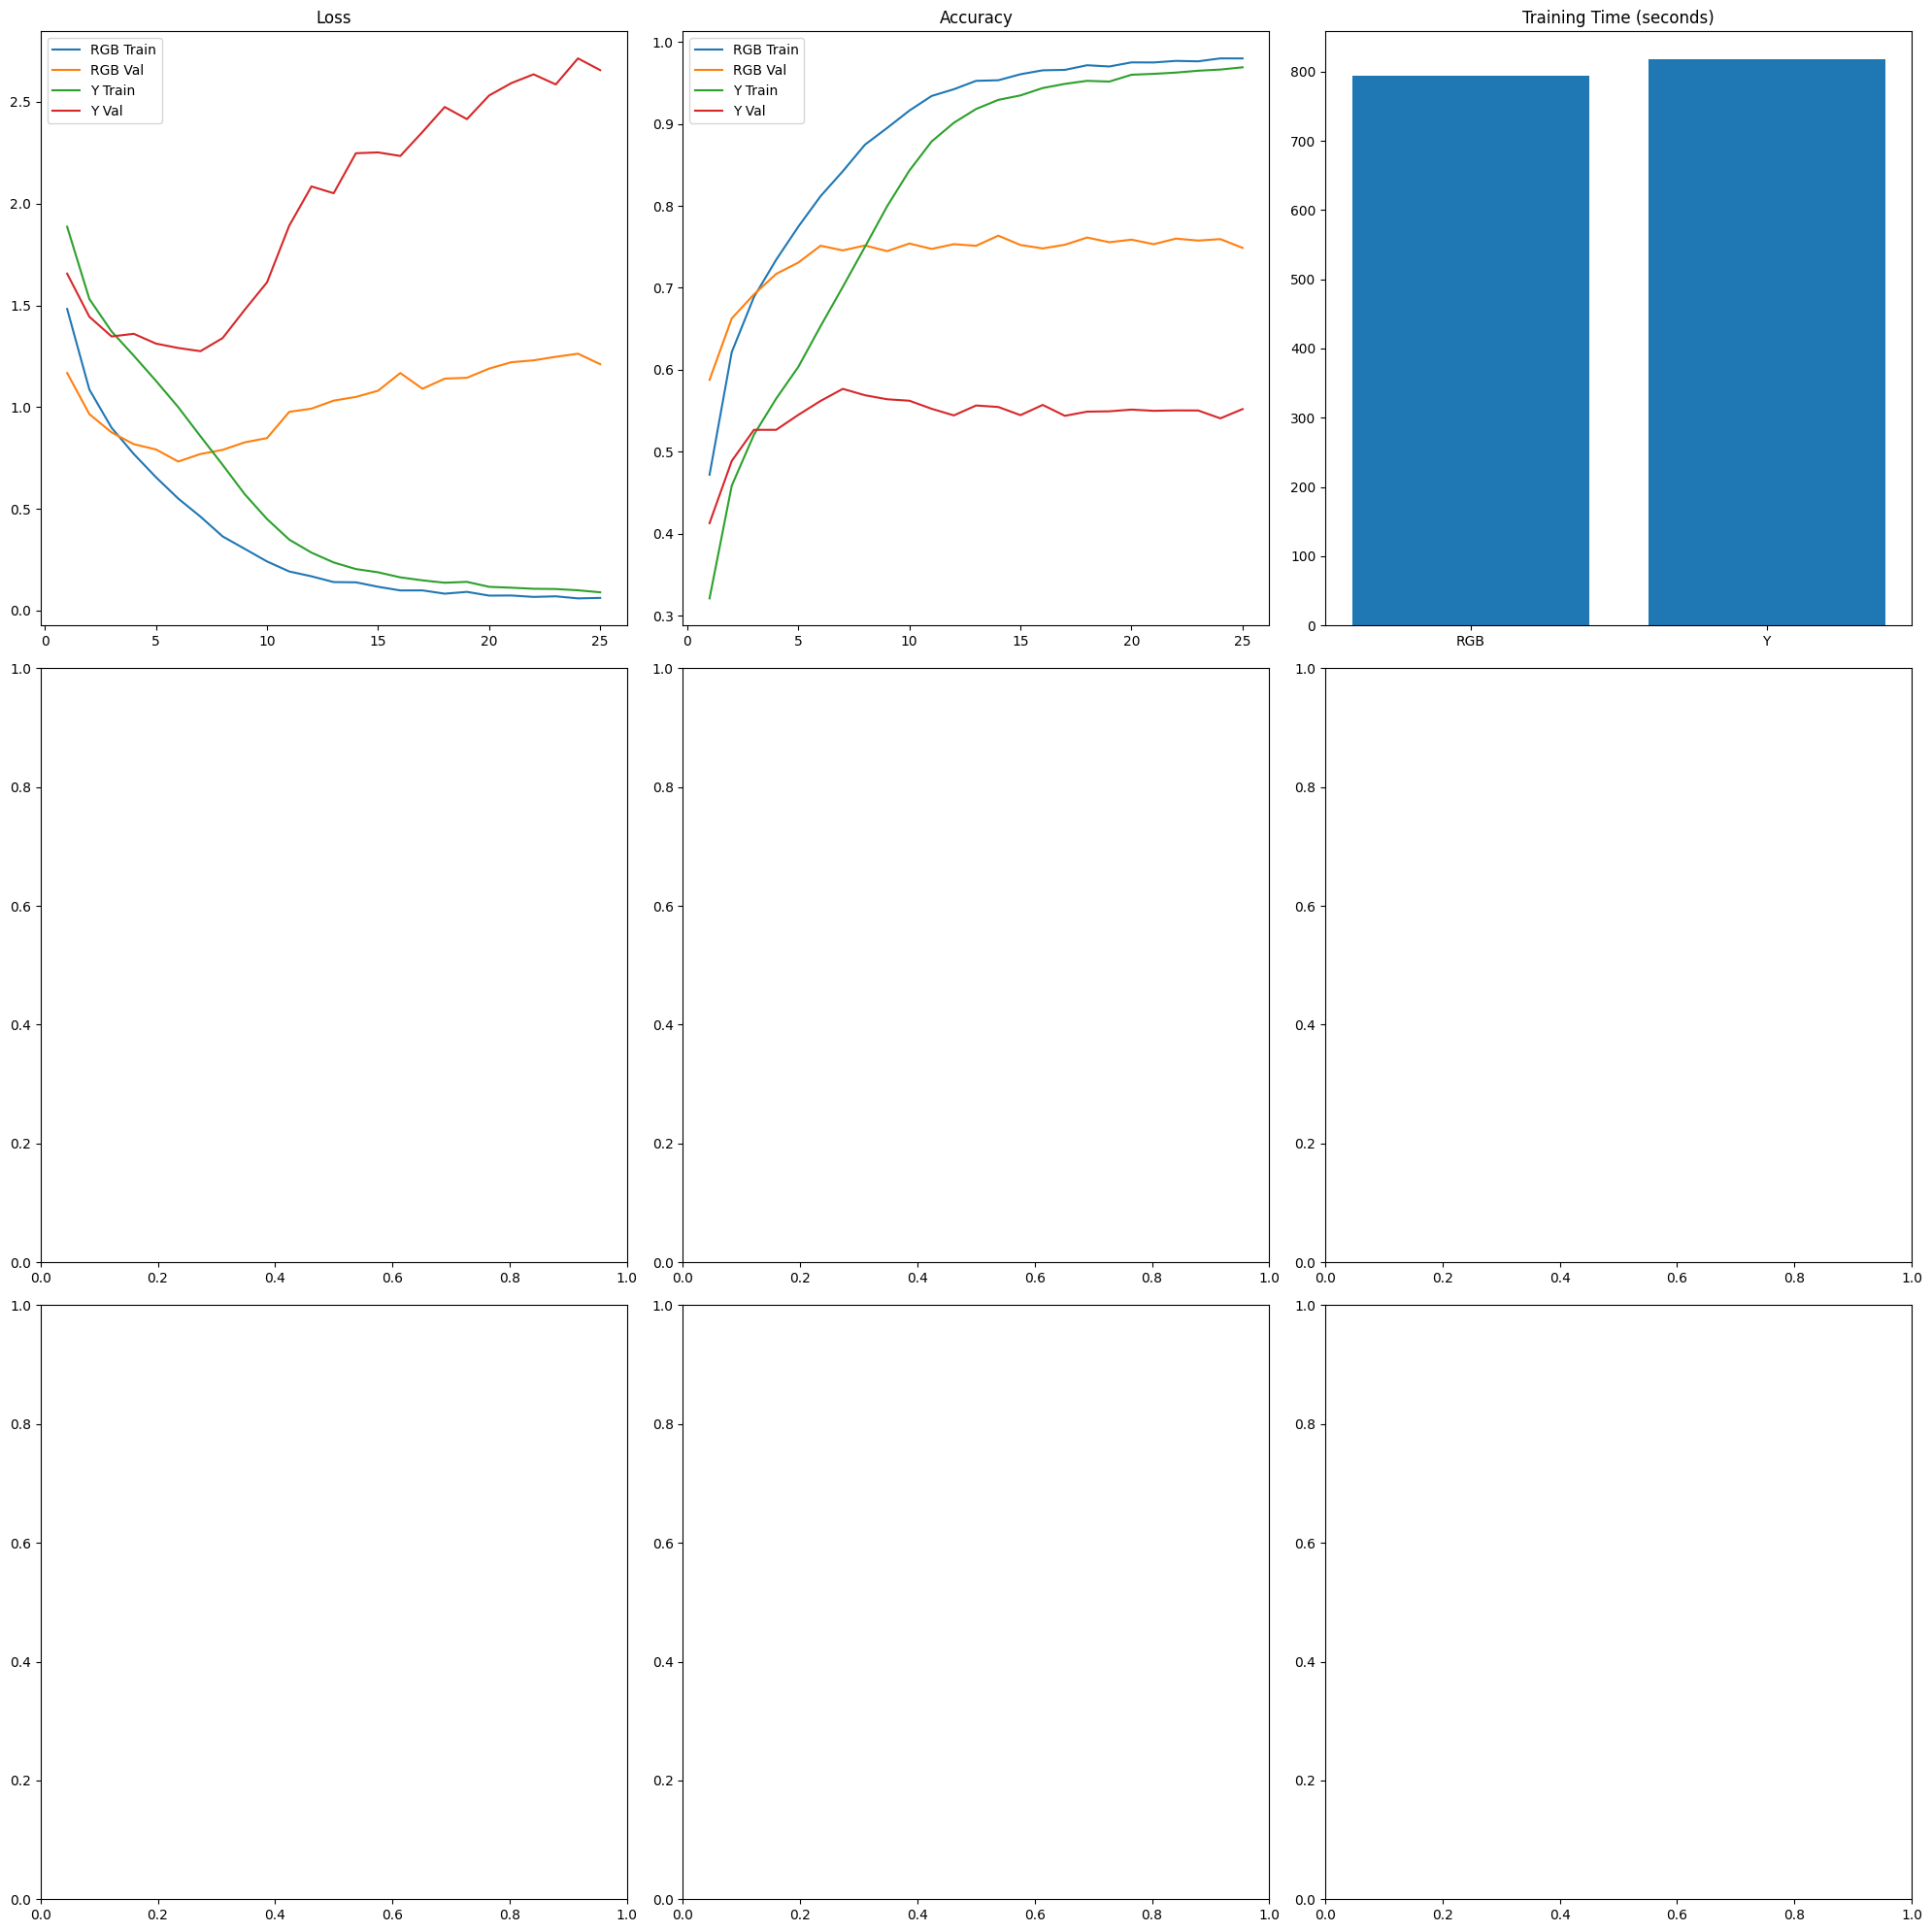

In [4]:
def main():
    torch.manual_seed(42)
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    num_classes = 10
    batch_size = 32
    num_epochs = 25
    learning_rate = 0.001

    rgb_time, y_time = 0, 0

    for use_y_channel in [False, True]:
        channel_type = "Y" if use_y_channel else "RGB"
        print(f"\nTraining {channel_type} model...")
        
        train_loader, val_loader, test_loader = get_cifar10_dataloaders(batch_size, use_y_channel)
        model = get_model(num_classes, use_y_channel)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        start_time = time.time()
        model, history = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device)
        end_time = time.time()
        training_time = end_time - start_time

        if use_y_channel:
            y_time = training_time
        else:
            rgb_time = training_time

        test_loss, test_acc = evaluate_model(model, test_loader, criterion, device)

        print(f"{channel_type} Model - Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")
        print(f"{channel_type} Model Training Time: {training_time:.2f} seconds")

        # Save model
        torch.save(model.state_dict(), f'cifar10_{channel_type.lower()}_model.pth')

        # Save history to CSV
        save_history(history, f'history_{channel_type.lower()}.csv')

    # Plot training history
    from visualize import plot_training_history
    plot_training_history('history_rgb.csv', 'history_y.csv', rgb_time, y_time)

if __name__ == "__main__":
    main()

In [ ]:
from visualize import plot_training_history
    plot_training_history('history_rgb.csv', 'history_y.csv', rgb_time, y_time)